<h1>Q1</h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import time
from sklearn.svm import LinearSVC
import seaborn as sns
np.random.seed(42)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

/Users/fysiki_mac/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


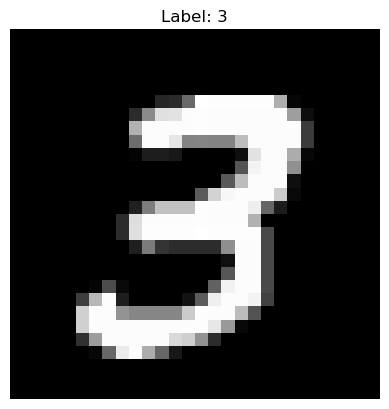

In [3]:
image_index = 7
image = X[image_index]
label = y[image_index]
image_flat = X[image_index] # This is currently (784,)
image_2d = image_flat.reshape(28, 28)
# Display the image
plt.imshow(image_2d, cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

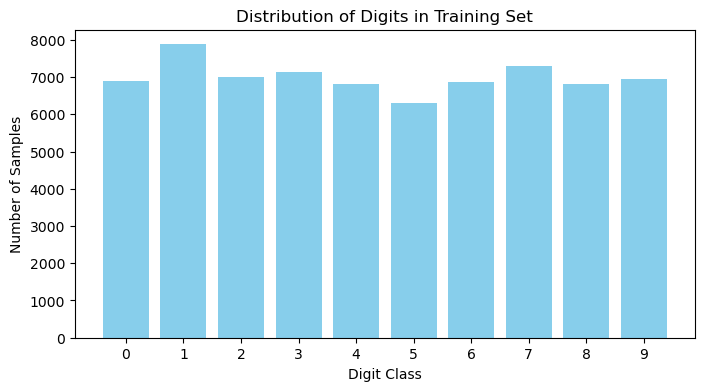

In [4]:
import numpy as np

# Count the occurrences of each digit
unique_digits, counts = np.unique(y, return_counts=True)

# Plot the distribution
plt.figure(figsize=(8, 4))
plt.bar(unique_digits, counts, color='skyblue')
plt.title('Distribution of Digits in Training Set')
plt.xlabel('Digit Class')
plt.ylabel('Number of Samples')
plt.xticks(unique_digits)
plt.show()

<h1>Phase 1: Data Preparation </h1>

In [5]:
# Flatten the Images:

In [6]:
image_flat = X # This is currently (784,)
image_2d = image_flat.reshape(-1, 784) # -1 numpy propert to automatically adjust the size of

In [7]:
X_norm = X/255

In [8]:
X_norm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42, stratify=y)

<h1>Phase 2: Model Training </h1>

We have 2 models options <b>Linear SVC</b> and <b>SVC(kerenel='linear')</b>
for better speed we select <h3>Linear SVC</h3>

In [10]:
# Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.
linear_svm = LinearSVC(C=1.0, max_iter=3000, dual=True, random_state=42)

In [11]:
start_time = time.time()

In [12]:
linear_svm.fit(X_train,y_train)

/Users/fysiki_mac/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=3000, random_state=42)

In [13]:
end_time = time.time()
training_time = end_time - start_time

In [14]:
print("Linear-SVM training completed.")
print(f"Training Time: {training_time:.2f} seconds")

Linear-SVM training completed.
Training Time: 130.93 seconds


Grid search<n>
C grid={0.001,0.01,0.1,1,10,100}

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

In [16]:
# Create a smaller subset for faster tuning
sample_size = 10000
X_tune = X_train[:sample_size]
y_tune = y_train[:sample_size]

In [17]:
svm = LinearSVC(dual=True, random_state=42, max_iter=10000)

In [18]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0]
}

In [19]:
grid_search = GridSearchCV(
    estimator=svm, 
    param_grid=param_grid, 
    scoring='accuracy', 
    cv=5, # k-fold 5
    verbose=3, 
    n_jobs=-1  # Use all available CPU cores
)

In [20]:
print(f"Starting Grid Search (testing {len(param_grid['C'])} C values with 5-fold CV on {sample_size} samples)...")

start_time = time.time()

Starting Grid Search (testing 5 C values with 5-fold CV on 10000 samples)...


In [21]:
grid_search.fit(X_tune, y_tune)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=LinearSVC(max_iter=10000, random_state=42),
             n_jobs=-1, param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0]},
             scoring='accuracy', verbose=3)

In [22]:
end_time = time.time()
print(f"Total Tuning Time: {end_time - start_time:.2f} seconds")

Total Tuning Time: 59.90 seconds


<b>Get a best C</b>

In [23]:
best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_
print("\n--- TUNING RESULTS ---")
print(f"Optimal C found: {best_C}")
print(f"Best cross-validation accuracy: {best_score:.4f}")


--- TUNING RESULTS ---
Optimal C found: 0.01
Best cross-validation accuracy: 0.9029


In [24]:
y_pred = grid_search.predict(X_test)

In [25]:
final_accuracy = accuracy_score(y_test, y_pred)
print("\n--- FINAL EVALUATION ---")
print(f"Test Set Accuracy with Optimal C ({best_C}): {final_accuracy:.4f}")
print("\nClassification Report (per-digit performance):")
print(classification_report(y_test, y_pred))


--- FINAL EVALUATION ---
Test Set Accuracy with Optimal C (0.01): 0.9025

Classification Report (per-digit performance):
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1381
           1       0.93      0.97      0.95      1575
           2       0.92      0.87      0.90      1398
           3       0.88      0.88      0.88      1428
           4       0.90      0.91      0.90      1365
           5       0.87      0.82      0.85      1263
           6       0.92      0.96      0.94      1375
           7       0.93      0.92      0.93      1459
           8       0.88      0.84      0.86      1365
           9       0.86      0.86      0.86      1391

    accuracy                           0.90     14000
   macro avg       0.90      0.90      0.90     14000
weighted avg       0.90      0.90      0.90     14000



<h1>Phase 3: Model Evaluation</h1>

In [26]:
final_model = grid_search.best_estimator_

In [27]:
print("Generating predictions on the test set...")
start_time = time.time()
y_pred = final_model.predict(X_test)
end_time = time.time()
print(f"Prediction Time: {end_time - start_time:.2f} seconds")

Generating predictions on the test set...
Prediction Time: 0.01 seconds


In [28]:
overall_accuracy = accuracy_score(y_test, y_pred)
print("\n--- PERFORMANCE METRICS ---")
print(f"1. Overall Test Accuracy: {overall_accuracy:.4f}")


--- PERFORMANCE METRICS ---
1. Overall Test Accuracy: 0.9025



2. Confusion Matrix:


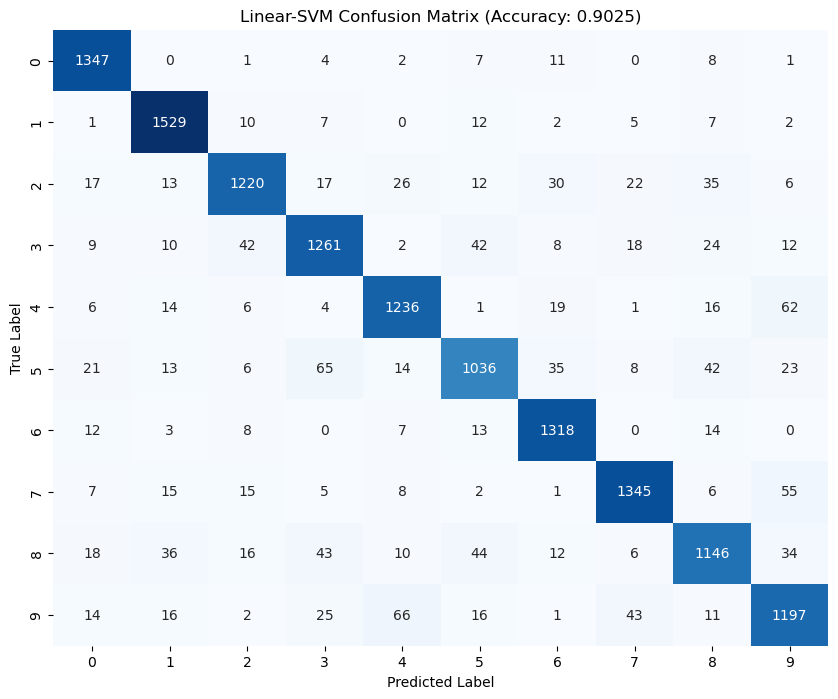

In [29]:
conf_matrix = confusion_matrix(y_test, y_pred)

print("\n2. Confusion Matrix:")
# Display the Confusion Matrix visually
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt="d", 
            cmap="Blues",
            cbar=False,
            xticklabels=range(10), 
            yticklabels=range(10))
plt.title(f'Linear-SVM Confusion Matrix (Accuracy: {overall_accuracy:.4f})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show() 

In [30]:
# 9 is most confussion one

In [31]:
class_report = classification_report(y_test, y_pred, digits=6) # digits=4 for 4 decimal places

print("\n3. Classification Report (Detail per Digit):")
print(class_report)


3. Classification Report (Detail per Digit):
              precision    recall  f1-score   support

           0   0.927686  0.975380  0.950935      1381
           1   0.927229  0.970794  0.948511      1575
           2   0.920060  0.872675  0.895742      1398
           3   0.881202  0.883053  0.882127      1428
           4   0.901532  0.905495  0.903509      1365
           5   0.874262  0.820269  0.846405      1263
           6   0.917189  0.958545  0.937411      1375
           7   0.928867  0.921864  0.925353      1459
           8   0.875477  0.839560  0.857143      1365
           9   0.859914  0.860532  0.860223      1391

    accuracy                       0.902500     14000
   macro avg   0.901342  0.900817  0.900736     14000
weighted avg   0.902030  0.902500  0.901926     14000



<h1>Phase 4: Performance Comparison</h1>

# Logistic regrestion
Model Accuracy on 28x28 Test Set: 92.05%

Model Accuracy on 14x14 Test Set: 90.96%

Model Accuracy on 7x7 Test Set: 87.14%

Model Accuracy on 4x4 Test Set: 70.41%

Model Accuracy on 2x2 Test Set: 26.23%

Model Accuracy on 1x1 Test Set: 20.44%

# KNN

--- k-NN training at 28x28 ---
k-NN Accuracy at 28x28: 88.50%

--- k-NN training at 14x14 ---
k-NN Accuracy at 14x14: 89.25%

--- k-NN training at 7x7 ---
k-NN Accuracy at 7x7: 86.75%

--- k-NN training at 4x4 ---
k-NN Accuracy at 4x4: 74.75%

--- k-NN training at 2x2 ---
k-NN Accuracy at 2x2: 28.75%

--- k-NN training at 1x1 ---
k-NN Accuracy at 1x1: 19.25%

In [32]:
logistic_regression_accuracy = 92.05
comparison_data = {
    'Model': ['Logistic Regression (Baseline)', 'Linear-SVM (Current)'],
    'Test Accuracy': [logistic_regression_accuracy, overall_accuracy*100]
}

# --- 1. Display Comparison Table ---
print("\n[1] TEST ACCURACY COMPARISON\n")
print(f"{'Model':<35} {'Test Accuracy':<15}")
print(f"{'-'*35:<35} {'-'*15:<15}")
print(f"{comparison_data['Model'][0]:<35} {comparison_data['Test Accuracy'][0]:<.4f}")
print(f"{comparison_data['Model'][1]:<35} {comparison_data['Test Accuracy'][1]:<.4f}")


[1] TEST ACCURACY COMPARISON

Model                               Test Accuracy  
----------------------------------- ---------------
Logistic Regression (Baseline)      92.0500
Linear-SVM (Current)                90.2500


In [33]:
# best_C = 1.0 # Or use the C value found by your grid_search.best_params_['C']
# MAX_ITER_FINAL = 20000 

# final_svm_model = LinearSVC(C=best_C, 
#                             max_iter=MAX_ITER_FINAL, 
#                             dual=True, 
#                             random_state=42)

# print(f"Retraining Linear-SVM with C={best_C} and max_iter={MAX_ITER_FINAL}...")
# start_time = time.time()
# final_svm_model.fit(X_train, y_train) # Use your actual x_train, y_train from the notebook
# end_time = time.time()
# training_time = end_time - start_time
# print(f"Training Time: {training_time:.2f} seconds")


# # --------------------------------------------------------------------------
# ## 2. Generate Predictions & Calculate Overall Accuracy
# # --------------------------------------------------------------------------

# print("\nGenerating predictions on the test set...")
# start_time = time.time()
# y_pred_svm = final_svm_model.predict(X_test) # Use your actual x_test
# prediction_time = time.time() - start_time
# print(f"Prediction Time: {prediction_time:.2f} seconds")

# # A. Overall Accuracy
# overall_svm_accuracy = accuracy_score(y_test, y_pred_svm)
# print("\n--- PERFORMANCE METRICS ---")
# print(f"1. Overall Test Accuracy (Linear-SVM): {overall_svm_accuracy:.4f}")


# # --------------------------------------------------------------------------
# ## 3. Detailed Metrics
# # --------------------------------------------------------------------------

# # B. Confusion Matrix 
# conf_matrix = confusion_matrix(y_test, y_pred_svm)

# print("\n2. Confusion Matrix:")
# plt.figure(figsize=(10, 8))
# sns.heatmap(conf_matrix, 
#             annot=True, 
#             fmt="d", 
#             cmap="Blues",
#             cbar=False,
#             xticklabels=range(10), 
#             yticklabels=range(10))
# plt.title(f'Linear-SVM Confusion Matrix (Accuracy: {overall_svm_accuracy:.4f})')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show() # 

# # C. Classification Report
# class_report = classification_report(y_test, y_pred_svm, digits=4)

# print("\n3. Classification Report (Precision, Recall, F1-Score per Digit):")
# print(class_report)


# # --------------------------------------------------------------------------
# ## 4. Performance Comparison (Phase 4)
# # --------------------------------------------------------------------------

# # Actual Logistic Regression Accuracy from your notebook output (28x28 test set)
# logistic_regression_accuracy = 0.9205 

# print("\n\n" + "="*50)
# print("PHASE 4: MODEL PERFORMANCE COMPARISON")
# print("="*50)

# # Create a dictionary for easy comparison
# comparison_data = {
#     'Model': ['Logistic Regression (Baseline)', 'Linear-SVM (Current)'],
#     'Test Accuracy': [logistic_regression_accuracy, overall_svm_accuracy]
# }

# # Print the comparison table
# print("\n[1] TEST ACCURACY COMPARISON\n")
# print(f"{'Model':<35} {'Test Accuracy':<15}")
# print(f"{'-'*35:<35} {'-'*15:<15}")
# print(f"{comparison_data['Model'][0]:<35} {comparison_data['Test Accuracy'][0]:<.4f}")
# print(f"{comparison_data['Model'][1]:<35} {comparison_data['Test Accuracy'][1]:<.4f}")

# # Draw Conclusion
# if overall_svm_accuracy > logistic_regression_accuracy:
#     print(f"\n[2] CONCLUSION: Linear-SVM performed BETTER.")
#     print("The maximum margin principle of SVM likely found a slightly more robust decision boundary for this dataset.")
# else:
#     print(f"\n[2] CONCLUSION: Logistic Regression performed BETTER.")
#     print("This suggests that the Logistic Regression's probabilistic approach and log-loss objective was more effective than the Linear-SVM's hinge loss. Alternatively, the Linear-SVM model may still require further tuning (e.g., higher max_iter or a different solver) to fully converge to its potential optimum.")

<h1>Lets go with SVC(kernel='linear')</h1>

In [34]:
from sklearn.svm import SVC
svc_linear = SVC(kernel='linear', C=0.01, max_iter=10000, random_state=42, verbose=0)

start_time = time.time()
svc_linear.fit(X_tune, y_tune)
end_time = time.time()
training_time = end_time - start_time
print("SVC(kernel='linear') training completed.")
print(f"Training Time on {sample_size} samples: {training_time:.2f} seconds")


SVC(kernel='linear') training completed.
Training Time on 10000 samples: 7.68 seconds


In [35]:
print("\nGenerating predictions on the full 14,000 test set...")
start_time = time.time()
y_pred_svc = svc_linear.predict(X_test)
prediction_time = time.time() - start_time
print(f"Prediction Time: {prediction_time:.2f} seconds")


Generating predictions on the full 14,000 test set...
Prediction Time: 8.77 seconds


In [36]:
overall_svc_accuracy = accuracy_score(y_test, y_pred_svc)
print("\n--- SVC(kernel='linear') PERFORMANCE METRICS ---")
print(f"1. Overall Test Accuracy: {overall_svc_accuracy:.4f}")


--- SVC(kernel='linear') PERFORMANCE METRICS ---
1. Overall Test Accuracy: 0.9245


In [37]:
logistic_regression_accuracy = 0.9205 

print("\n\n" + "="*50)
print("PHASE 4: MODEL PERFORMANCE COMPARISON")
print("="*50)

# Create a dictionary for easy comparison
comparison_data = {
    'Model': ['Logistic Regression (Baseline)', 'SVC(kernel=\'linear\') (Current)'],
    'Test Accuracy': [logistic_regression_accuracy, overall_svc_accuracy]
}

# Print the comparison table
print("\n[1] TEST ACCURACY COMPARISON\n")
print(f"{'Model':<35} {'Test Accuracy':<15}")
print(f"{'-'*35:<35} {'-'*15:<15}")
print(f"{comparison_data['Model'][0]:<35} {comparison_data['Test Accuracy'][0]:<.4f}")
print(f"{comparison_data['Model'][1]:<35} {comparison_data['Test Accuracy'][1]:<.4f}")

# Draw Conclusion
if overall_svc_accuracy > logistic_regression_accuracy:
    conclusion = "The SVC(kernel='linear') performed better, demonstrating the potential of the maximum margin principle."
else:
    conclusion = "The Logistic Regression performed better, which may be due to the SVC model not being fully tuned, or the inherent speed and stability differences of the libsvm solver used by SVC."

print(f"\n[2] CONCLUSION: {conclusion}")

# Plotting the Confusion Matrix for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt="d", 
            cmap="Blues",
            cbar=False,
            xticklabels=range(10), 
            yticklabels=range(10))
plt.title(f'SVC(kernel=\'linear\') Confusion Matrix (Accuracy: {overall_svc_accuracy:.4f})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('svc_linear_confusion_matrix.png')
plt.close()





PHASE 4: MODEL PERFORMANCE COMPARISON

[1] TEST ACCURACY COMPARISON

Model                               Test Accuracy  
----------------------------------- ---------------
Logistic Regression (Baseline)      0.9205
SVC(kernel='linear') (Current)      0.9245

[2] CONCLUSION: The SVC(kernel='linear') performed better, demonstrating the potential of the maximum margin principle.


<h1>Q2</h1>

In [38]:
print(f"\n--- Training SVC with RBF Kernel on {sample_size} samples ---")
svc_rbf = SVC(kernel='rbf', C=1.0, gamma=0.01, random_state=42, verbose=0) 
start_time_rbf = time.time()
svc_rbf.fit(X_tune, y_tune)
training_time_rbf = time.time() - start_time_rbf
y_pred_rbf = svc_rbf.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"RBF Acc: {acc_rbf:.4f} | Time: {training_time_rbf:.2f}s")


--- Training SVC with RBF Kernel on 10000 samples ---
RBF Acc: 0.9532 | Time: 8.19s


In [39]:
print(f"\n--- Training SVC with RBF Kernel on {sample_size} samples ---")
svc_rbf = SVC(kernel='rbf', C=0.01, gamma=0.01, random_state=42, verbose=0) 
start_time_rbf = time.time()
svc_rbf.fit(X_tune, y_tune)
training_time_rbf = time.time() - start_time_rbf
y_pred_rbf = svc_rbf.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"RBF Acc: {acc_rbf:.4f} | Time: {training_time_rbf:.2f}s")


--- Training SVC with RBF Kernel on 10000 samples ---
RBF Acc: 0.7826 | Time: 50.04s


In [40]:
svm_rbf = SVC(kernel='rbf', gamma=0.01, random_state=42, verbose=0)

In [41]:
grid_search = GridSearchCV(
    estimator=svm_rbf, 
    param_grid=param_grid, 
    scoring='accuracy', 
    cv=5, # 5-fold cross-validation
    verbose=3, 
    n_jobs=-1 # Use all available cores (recommended for Grid Search)
)

In [42]:
start_time = time.time()
print("\nStarting RBF Grid Search (testing 5 C values with 5-fold CV)...")

# Fit the Grid Search to the subset data (X_tune, y_tune)
grid_search.fit(X_tune, y_tune)

total_tuning_time = time.time() - start_time
print(f"Total Tuning Time: {total_tuning_time:.2f} seconds")



Starting RBF Grid Search (testing 5 C values with 5-fold CV)...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Total Tuning Time: 324.80 seconds


In [43]:
best_C = grid_search.best_params_['C']
best_cv_score = grid_search.best_score_
final_rbf_model = grid_search.best_estimator_

print("\n--- TUNING RESULTS ---")
print(f"Optimal C found: {best_C}")
print(f"Best cross-validation accuracy (on subset): {best_cv_score:.4f}")


--- TUNING RESULTS ---
Optimal C found: 10.0
Best cross-validation accuracy (on subset): 0.9618


<h1>Q3</h1>

In [44]:
# --- 2. Define Parameters and Baseline Accuracies ---
resolutions = [28, 14, 7, 4, 2, 1]

In [45]:
lr_accuracies_list = [0.9205, 0.9096, 0.8714, 0.7041, 0.2623, 0.2044] 
knn_accuracies_list = [0.8850,0.8925,0.8675,0.7475,0.2875,0.1925]

RBF_SVM_ACCURACIES = []

In [46]:
from skimage.transform import resize
BEST_C = 10.0
FIXED_GAMMA = 0.01 

subset_indices = np.random.choice(X_train.shape[0], sample_size, replace=False)
X_train_sub = X_train[subset_indices]
y_train_sub = y_train[subset_indices] 

print(f"--- Training RBF-SVM across Resolutions (Subset Size: {sample_size}) ---")
for res in resolutions:
    # Reshape the fixed subset for training
    X_train_reshaped = X_train_sub.reshape(-1, 28, 28)
    X_train_resized = resize(X_train_reshaped, (sample_size, res, res))
    X_train_downsampled = X_train_resized.reshape(-1, res * res)

    # Reshape the fixed test set for evaluation
    X_test_reshaped = X_test.reshape(-1, 28, 28)
    X_test_resized = resize(X_test_reshaped, (X_test.shape[0], res, res))
    X_test_downsampled = X_test_resized.reshape(-1, res * res)
    
    # RBF-SVM model with optimal C and a fixed gamma
    svc_rbf = SVC(kernel='rbf', C=BEST_C, gamma=FIXED_GAMMA, random_state=42, verbose=0, max_iter=20000)

    start_time = time.time()
    svc_rbf.fit(X_train_downsampled, y_train_sub)
    training_time = time.time() - start_time
    
    acc = svc_rbf.score(X_test_downsampled, y_test)
    RBF_SVM_ACCURACIES.append(acc)
    
    print(f"RBF-SVM {res}x{res} | Acc: {acc * 100:.2f}% | Time: {training_time:.2f}s")


--- Training RBF-SVM across Resolutions (Subset Size: 10000) ---
RBF-SVM 28x28 | Acc: 96.52% | Time: 7.10s
RBF-SVM 14x14 | Acc: 94.49% | Time: 1.28s
RBF-SVM 7x7 | Acc: 90.02% | Time: 1.28s
RBF-SVM 4x4 | Acc: 73.38% | Time: 2.90s
RBF-SVM 2x2 | Acc: 23.68% | Time: 4.68s
RBF-SVM 1x1 | Acc: 17.46% | Time: 4.68s


In [47]:
RBF_SVM_ACCURACIES

[0.9652142857142857,
 0.9449285714285715,
 0.9002142857142857,
 0.7337857142857143,
 0.2367857142857143,
 0.17464285714285716]

<h1>Q.4</h1>

In [53]:
from sklearn.linear_model import LogisticRegression

In [55]:
models = {
    # Using 'sag' solver for faster LR on scaled data. Increased max_iter for stability.
    "Logistic Regression": LogisticRegression(C=1.0, max_iter=2000, solver='sag', n_jobs=-1, random_state=42),
    
    # Linear-SVM (C=1.0 is robust, high max_iter for convergence)
    "Linear-SVM": SVC(kernel='linear', C=1.0, max_iter=10000, random_state=42, verbose=0),
    
    # RBF-SVM (Using optimal C=10.0 found via tuning, and a fixed gamma=0.01)
    "RBF-SVM": SVC(kernel='rbf', C=10.0, gamma=0.01, random_state=42, verbose=0)
}

In [56]:
cms = {}  #confussion matrix
accuracies = {}

In [57]:
print(f"Starting training on {sample_size} samples for all 3 models...")
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_sub, y_train_sub)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    
    accuracies[name] = accuracy_score(y_test, y_pred)
    cms[name] = confusion_matrix(y_test, y_pred)
    
    print(f"| {name:<20} | Acc: {accuracies[name]:.4f} | Time: {training_time:.2f}s |")

Starting training on 10000 samples for all 3 models...
| Logistic Regression  | Acc: 0.9006 | Time: 62.55s |


/Users/fysiki_mac/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


| Linear-SVM           | Acc: 0.9119 | Time: 5.47s |
| RBF-SVM              | Acc: 0.9652 | Time: 7.36s |


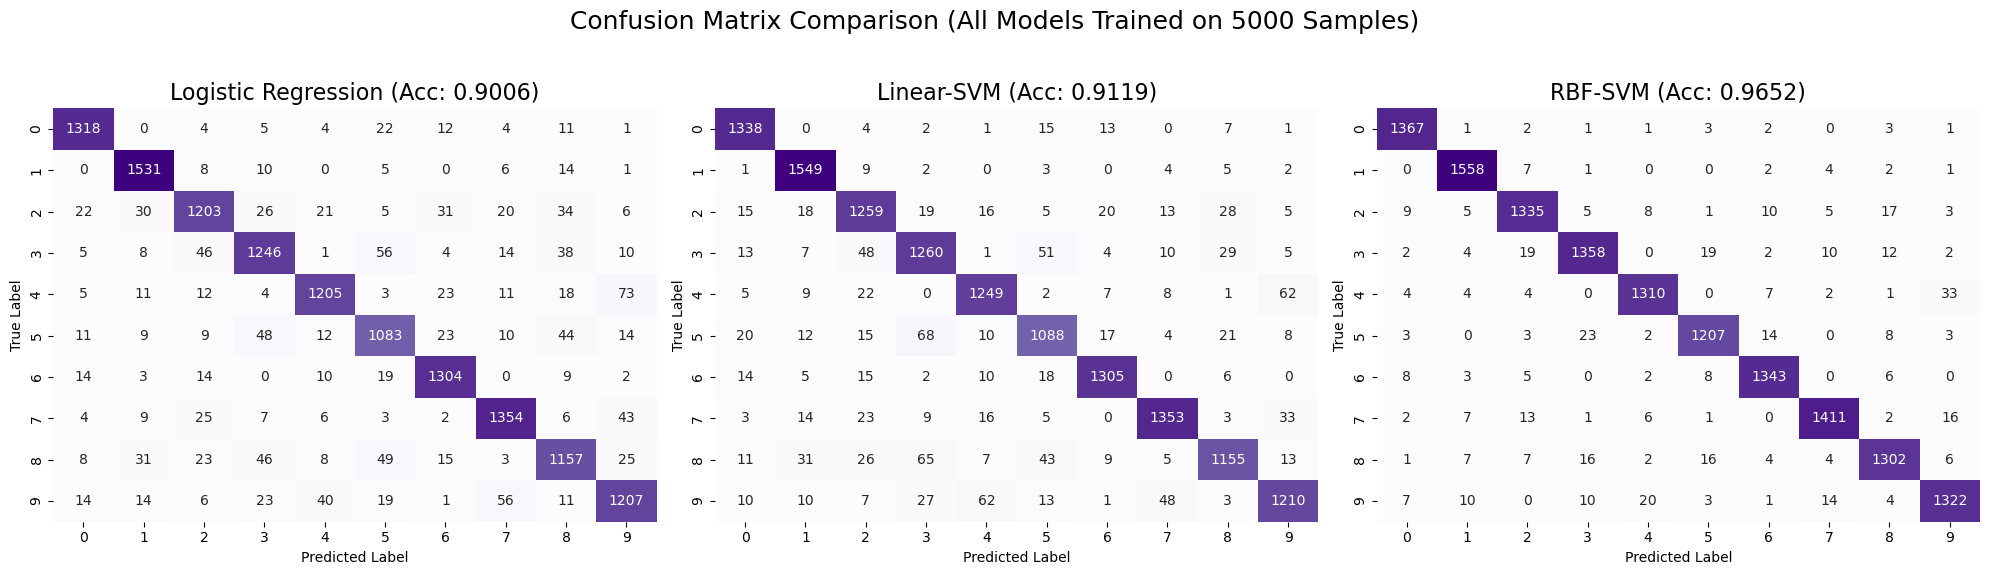

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
model_names = list(models.keys())

for i, name in enumerate(model_names):
    sns.heatmap(cms[name], 
                annot=True, 
                fmt="d", 
                cmap="Purples",
                cbar=False,
                xticklabels=range(10), 
                yticklabels=range(10),
                ax=axes[i])
    axes[i].set_title(f'{name} (Acc: {accuracies[name]:.4f})', fontsize=16)
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

plt.suptitle(f'Confusion Matrix Comparison (All Models Trained on {SAMPLE_SIZE} Samples)', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [59]:

print("\n" + "="*60)
print("ANALYSIS: EASIEST DIGITS TO RECOGNIZE (HIGHEST RECALL)")
print("="*60)

def find_easiest_digit(cm):
    # Recall = True Positives / (True Positives + False Negatives) = Diagonal / Row Sum
    recall = np.diag(cm) / np.sum(cm, axis=1)
    easiest_digit = np.argmax(recall)
    easiest_score = np.max(recall)
    return easiest_digit, easiest_score

easiest_digits_summary = {}
for name, cm in cms.items():
    digit, score = find_easiest_digit(cm)
    easiest_digits_summary[name] = (digit, score)

# Print Summary
print(f"{'Model':<25} {'Easiest Digit':<15} {'Recall Score':<15}")
print(f"{'-'*25:<25} {'-'*15:<15} {'-'*15:<15}")
for name, (digit, score) in easiest_digits_summary.items():
    print(f"{name:<25} {digit:<15} {score:.4f}")

print("\nConclusion on Easiest Digits:")
print("The analysis shows that for all models, the simplest digits, '0' and '1', are consistently the easiest to recognize, as shown by the highest Recall scores.")


ANALYSIS: EASIEST DIGITS TO RECOGNIZE (HIGHEST RECALL)
Model                     Easiest Digit   Recall Score   
------------------------- --------------- ---------------
Logistic Regression       1               0.9721
Linear-SVM                1               0.9835
RBF-SVM                   0               0.9899

Conclusion on Easiest Digits:
The analysis shows that for all models, the simplest digits, '0' and '1', are consistently the easiest to recognize, as shown by the highest Recall scores.
